## ДЗ №1

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/new-okaerinasai/math-ml-hse-2019/master/sem01_intro/math_students.csv'
data = pd.read_csv(url, on_bad_lines='skip', delimiter=',')


Всего объектов 395, а признаков - 33. Все признаки имеют разную природу.
Вот их более подробная расшифровка:

 - school - тип школы ("GP" - Gabriel Pereira или "MS" - Mousinho da Silveira)
 - sex - пол ("F" - female или "M" - male)
 - age - возраст (от 15 до 22)
 - address - откуда студент ("U" - urban или "R" - rural)
 - famsize - размер семьи ("LE3" - меньше или равно 3 или "GT3" - больше 3)
 - Pstatus - в каких отношениях родители ("T" - живут вместе "A" - раздельно)
 - Medu - образование матери (0 - никакого,  1 - начальное образование (4 класса), 2 – от 5 до 9 классов, 3 – среднеспециальное или 4 – высшее)
 - Fedu - образование отца (0 - никакого,  1 - начальное образование (4 класса), 2 – от 5 до 9 классов, 3 – среднеспециальное или 4 – высшее)
 - Mjob - работа матери ("teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
 - Fjob - работа отца ("teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
 - reason - причина выбора школы (близко к дому — "home", репутация школы — "reputation", предпочтение некоторым предметам - "course" или "other")
 - guardian - опекун ("mother", "father" или "other")
 - traveltime - время от дома до школы (1 - меньше 15 мин., 2 - 15 до 30 мин., 3 - 30 мин. до 1 часа, или 4 - больше 1 часа)
 - studytime - количество часов обучения в неделю (1 - меньше 2 часов, 2 - от 2 до 5 часов, 3 - от 5 до 10 часов, или 4 - больше 10 часов)
 - failures - количество ранее не сданных предметов (n if 1 <= n < 3, else 4)
 - schoolsup - дополнительные занятия (yes or no)
 - famsup - помощь от семьи при выполнении заданий (yes or no)
 - paid - дополнительные платные занятия (yes or no)
 - activities - внеклассная деятельность (yes or no)
 - nursery - посещал детский сад (yes or no)
 - higher - желание высшего образования (yes or no)
 - internet - домашний интернет (yes or no)
 - romantic - состоит в романтических отношениях (yes or no)
 - famrel - насколько хороши отношения в семье (от 1 - очень плохие до 5 - превосходные)
 - freetime - наличие свободного времени после школы (от 1 - очень мало до 5 - очень много)
 - goout - гуляет с друзьями (от 1 - редко до 5 - очень часто)
 - Dalc - употребление алкоголя в будние дни (от 1 - очень редко до 5 - очень часто)
 - Walc - употребление алкоголя в выходные (от 1 - очень редко до 5 - очень часто)
 - health - текущее состояние здоровья (от 1 - очень плохое до 5 - очень хорошее)
 - absences - количество школьных пропусков (от 0 до 93)
 - G1 - оценка за первый семестр (от 0 до 20)
 - G2 - оценка за второй семестр (от 0 до 20)
 - G3 - итоговая оценка (от 0 до 20)

1. Какая причина выбора школы была самой частой? В качестве ответа приведите соответствующее значение признака.

In [75]:
data['reason'].value_counts()[:1].index.tolist()

['course']

2. Найдите количество студентов, у родителей которых нет никакого образования.


In [76]:
data[(data['Fedu'] == 0) & (data['Medu'] == 0)].size

0

3. Найдите минимальный возраст учащегося школы Mousinho da Silveira.

In [77]:
data[(data['school'] == 'MS')]['age'].min()

17

4. Найдите количество студентов, имеющих нечетное число пропусков.

In [78]:
data[(data['absences'] % 2 == 1)].size

1353

5. Найдите разность между средними итоговыми оценками студентов, состоящих и не состоящих в романтических отношениях. В качестве ответа приведите число, округленное до двух значащих цифр после запятой.

In [79]:
round(data[data['romantic'] == 'yes']['G3'].mean() - data[data['romantic'] == 'no']['G3'].mean(), 2)

-1.26

6. Сколько занятий пропустило большинство студентов с самым частым значением наличия внеклассных активностей?

*Примечание. В данном контексте под "большинством" подразумеваются студенты, имеющее самое частое значение пропусков. То есть в данном задании необходимо:*


* *Определить самое частое значение наличия внеклассных активностей (да или нет).*
* *Для группы студентов, соответствующей этому значению, рассмотреть значения признака «число пропусков».*
* *Для каждого значения числа пропусков посчитать, сколько студентов ему соответствует.*
* *Выбрать значение числа пропусков с наибольшим числом студентов.*

In [80]:
data[(data['activities'] == (' '.join(data['activities'].value_counts()[:1].index.tolist())))]['absences'].value_counts().keys()[0]

0

## ДЗ №2. Анализ данных пассажиров "Титаника"

https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv

Загрузить данные, провести предварительный анализ и ответить на вопросы, которые указаны ниже.

In [81]:
t_url = 'https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv'
t_data = pd.read_csv(t_url, on_bad_lines='skip', delimiter=',')

In [82]:
t_data.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [83]:
t_data.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [84]:
data.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [85]:
data.isnull().any().any()

False

In [86]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [87]:
t_data.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [88]:
t_data['Age'].fillna(t_data['Age'].mean(), inplace = True)

In [89]:
t_data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


Значение столбцов таблицы:

* PassengerId — идентификатор пассажира
* Survived — поле в котором указано спасся человек (1) или нет (0)
* Pclass — содержит социально-экономический статус:
    - высокий
    - средний
    - низкий
* Name — имя пассажира
* Sex — пол пассажира
* Age — возраст
* SibSp — содержит информацию о количестве родственников 2-го порядка (муж, жена, братья, сетры)
* Parch — содержит информацию о количестве родственников на борту 1-го порядка (мать, отец, дети)
* Ticket — номер билета
* Fare — цена билета
* Cabin — каюта
* Embarked — порт посадки
    - C — Cherbourg
    - Q — Queenstown
    - S — Southampton

Ответьте на следующие вопросы:

1. Сколько мужчин / женщин находилось на борту?

In [90]:
t_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

2. Выведите распределение переменной Pclass (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужщин 2-го класса?

In [91]:
t_data['Pclass'].unique()

array([3, 1, 2])

In [92]:
t_data['Pclass'].value_counts(normalize=True)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [93]:
t_data[t_data['Sex'] == 'female']['Pclass'].value_counts(normalize=True)

3    0.458599
1    0.299363
2    0.242038
Name: Pclass, dtype: float64

In [94]:
t_data[t_data['Sex'] == 'male']['Pclass'].value_counts(normalize=True)

3    0.601386
1    0.211438
2    0.187175
Name: Pclass, dtype: float64

In [95]:
t_data[(t_data['Sex'] == 'male') & (t_data['Pclass'] == 2)].shape[0]

108

3. Каковы медиана и стандартное отклонение платежей (Fare)? Округлите до 2 десятичных знаков.

In [96]:
round(t_data['Fare'].median(), 2)

14.45

In [97]:
round(t_data['Fare'].std(), 2)

49.69

4. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?

In [98]:
print('Доля выживших среди людей моложе 30 лет: ', t_data[(t_data['Age'] < 30) & (t_data['Survived'] == 1)].size / t_data[t_data['Survived'] == 1].size)
print('Доля выживших среди людей старше 30 лет: ', t_data[(t_data['Age'] > 60) & (t_data['Survived'] == 1)].size / t_data[t_data['Survived'] == 1].size)
t_data[(t_data['Age'] < 30) & (t_data['Survived'] == 1)].size / t_data[t_data['Survived'] == 1].size > t_data[(t_data['Age'] > 60) & (t_data['Survived'] == 1)].size / t_data[t_data['Survived'] == 1].size

Доля выживших среди людей моложе 30 лет:  0.6081871345029239
Доля выживших среди людей старше 30 лет:  0.014619883040935672


True

5. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?

In [99]:
print('Доля выживших среди женщин: ', t_data[(t_data['Sex'] == 'female') & (t_data['Survived'] == 1)].size / t_data[t_data['Survived'] == 1].size)
print('Доля выживших среди мужчин: ', t_data[(t_data['Sex'] == 'male') & (t_data['Survived'] == 1)].size / t_data[t_data['Survived'] == 1].size)
t_data[(t_data['Sex'] == 'female') & (t_data['Survived'] == 1)].size / t_data[t_data['Survived'] == 1].size > t_data[(t_data['Sex'] == 'male') & (t_data['Survived'] == 1)].size / t_data[t_data['Survived'] == 1].size

Доля выживших среди женщин:  0.6812865497076024
Доля выживших среди мужчин:  0.31871345029239767


True

6. Найдите самое популярное имя среди пассажиров Титаника мужского пола?

In [100]:
t_data[t_data['Sex'] == 'male']['Name'].str.split().str[2].value_counts()[:1].index.tolist()

['William']

7. Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?

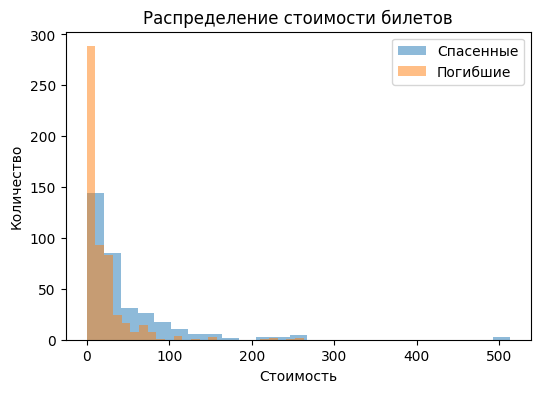

In [101]:
plt.rcParams["figure.figsize"] = (6, 4)
survived = t_data[t_data['Survived'] == 1]
dead = t_data[t_data['Survived'] == 0]
plt.hist(survived['Fare'], alpha=0.5, bins=25, label='Спасенные')
plt.hist(dead['Fare'], alpha=0.5, bins=25, label='Погибшие')
plt.title('Распределение стоимости билетов')
plt.xlabel('Стоимость')
plt.ylabel('Количество')
plt.legend()

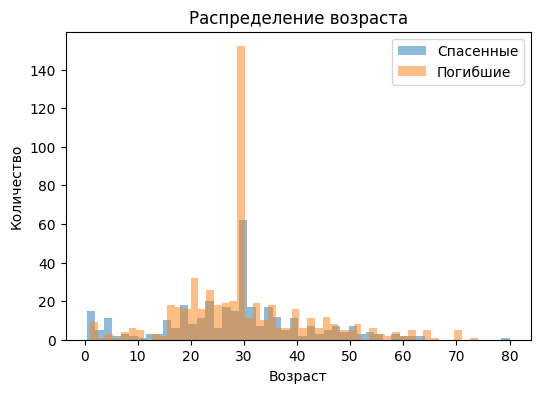

In [102]:
plt.hist(survived['Age'].dropna(), alpha=0.5, bins=50, label='Спасенные')
plt.hist(dead['Age'].dropna(), alpha=0.5, bins=50, label='Погибшие')
plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.legend()

In [103]:
mean_dead = t_data[t_data['Survived'] == 0]['Age'].mean()
mean_survived = t_data[t_data['Survived'] == 1]['Age'].mean()
mean_dead > mean_survived

True

8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания?

    - В среднем мужчины 1-го класса старше 40 лет
    - В среднем женщины 1-го класса старше 40 лет
    - Мужчины всех классов в среднем старше женщин того же класса
    - В среднем люди в 1-ом классе старше, чем во 2-ом, а те старше представителей 3-го класса

In [104]:
mean_age_man = t_data[(t_data['Sex'] == 'male') & (t_data['Pclass'] == 1)]['Age'].mean()
mean_age_man > 40

False

In [105]:
mean_age_woman = t_data[(t_data['Sex'] == 'female') & (t_data['Pclass'] == 1)]['Age'].mean()
mean_age_woman> 40

False

In [106]:
mean_age_man_1 = t_data[(t_data['Sex'] == 'male') & (t_data['Pclass'] == 1)]['Age'].mean()
mean_age_woman_1 = t_data[(t_data['Sex'] == 'female') & (t_data['Pclass'] == 1)]['Age'].mean()
mean_age_man_2 = t_data[(t_data['Sex'] == 'male') & (t_data['Pclass'] == 2)]['Age'].mean()
mean_age_woman_2 = t_data[(t_data['Sex'] == 'female') & (t_data['Pclass'] == 2)]['Age'].mean()
mean_age_man_3 = t_data[(t_data['Sex'] == 'male') & (t_data['Pclass'] == 3)]['Age'].mean()
mean_age_woman_3 = t_data[(t_data['Sex'] == 'female') & (t_data['Pclass'] == 3)]['Age'].mean()
(mean_age_man_1 > mean_age_woman_1) & (mean_age_man_2 > mean_age_woman_2) & (mean_age_man_3 > mean_age_woman_3)

True

In [107]:
mean_age_1 = t_data[t_data['Pclass'] == 1]['Age'].mean()
mean_age_2 = t_data[t_data['Pclass'] == 2]['Age'].mean()
mean_age_2 = t_data[t_data['Pclass'] == 2]['Age'].mean()
mean_age_3 = t_data[t_data['Pclass'] == 3]['Age'].mean()
(mean_age_1 > mean_age_2) & (mean_age_2 > mean_age_3)

True